## Problem statement
#### Lending Club enables borrowers to create unsecured personal loans. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.
#### In this project you will have to put yourself in the shoes of a loan issuer and manage credit risk by using the past data and deciding whom to give the loan to in the future. The text files contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.
#### The data should be divided into train (June 2007 - May 2015) and out-of-time test (June 2015 - Dec 2015) data. You will have use the training data to build models/analytical solution and finally apply it to test data to measure the performance and robustness of the models. 


## Importing the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                        
warnings.filterwarnings("ignore")

## Reading the dataset

In [2]:
project = pd.read_table("XYZCorp_LendingData.txt",parse_dates=['issue_d'],low_memory=False)

In [3]:
project.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


* *As the value 0 for default payment means 'not default' and value 1 means 'default'

In [4]:
project.shape

(855969, 73)

In [5]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null datetime64[ns]
pymnt_plan   

In [6]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.unique().shape[0],axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})

In [7]:
inspect_data(project)

,Data Type,No of Levels,Levels
id,int64,855969,[1077501 1077430 1077175 ... 36271333 36490806...
member_id,int64,855969,[1296599 1314167 1313524 ... 38982739 39222577...
loan_amnt,float64,1368,[5000.0 2500.0 2400.0 ... 32825.0 32575.0 3417...
funded_amnt,float64,1368,[5000.0 2500.0 2400.0 ... 32825.0 32575.0 3417...
funded_amnt_inv,float64,8818,[4975.0 2500.0 2400.0 ... 33625.0 34125.0 3052...
term,object,2,[' 36 months' ' 60 months']
int_rate,float64,520,[10.65 15.27 15.96 13.49 12.69 7.9 18.64 21.28...
installment,float64,67349,[162.87 59.83 84.33 ... 685.27 185.06 237.86]
grade,object,7,['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade,object,35,['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' ...


## spliting the data into train and test 

In [8]:
train = project[project['issue_d'] < '2015-6-01']
test = project[project['issue_d'] >= '2015-6-01']

In [9]:
train.shape

(598978, 73)

In [10]:
test.shape

(256991, 73)

In [11]:
train=train.drop(['issue_d'],1)
test=test.drop(['issue_d'],1)

In [12]:
train.shape

(598978, 72)

In [13]:
train.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,5.989780e+05,5.989780e+05,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,5.989780e+05,598978.000000,598978.000000,...,0.0,0.0,0.0,0.0,0.0,5.316650e+05,0.0,0.0,0.0,598978.000000
mean,2.044157e+07,2.231985e+07,14540.642519,14521.789031,14478.973948,13.520911,434.562058,7.397280e+04,17.638408,0.297171,...,NaN,NaN,NaN,NaN,NaN,3.111062e+04,NaN,NaN,NaN,0.077058
std,1.619182e+07,1.711491e+07,8336.476483,8327.529212,8337.695086,4.370961,242.892709,5.676163e+04,8.070746,0.828659,...,NaN,NaN,NaN,NaN,NaN,3.638326e+04,NaN,NaN,NaN,0.266684
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000
25%,5.937838e+06,7.205072e+06,8000.000000,8000.000000,8000.000000,10.160000,259.642500,4.500000e+04,11.610000,0.000000,...,NaN,NaN,NaN,NaN,NaN,1.370000e+04,NaN,NaN,NaN,0.000000
50%,1.564996e+07,1.763377e+07,12600.000000,12525.000000,12500.000000,13.330000,381.840000,6.300000e+04,17.210000,0.000000,...,NaN,NaN,NaN,NaN,NaN,2.320000e+04,NaN,NaN,NaN,0.000000
75%,3.671239e+07,3.943412e+07,20000.000000,20000.000000,20000.000000,16.290000,568.900000,9.000000e+04,23.290000,0.000000,...,NaN,NaN,NaN,NaN,NaN,3.870000e+04,NaN,NaN,NaN,0.000000
max,5.095230e+07,5.433202e+07,35000.000000,35000.000000,35000.000000,28.990000,1409.990000,8.706582e+06,39.990000,39.000000,...,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN,1.000000


In [14]:
test.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,2.569910e+05,2.569910e+05,256991.000000,256991.000000,256991.000000,256991.000000,256991.000000,2.569910e+05,256991.000000,256991.00000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,2.569910e+05,13288.000000,13288.000000,13288.000000,256991.000000
mean,5.974144e+07,6.376366e+07,15223.206163,15223.206163,15215.357153,12.426461,440.144417,7.763123e+04,19.249675,0.34530,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.434194e+04,0.947772,1.524232,1.841963,0.001210
std,5.238096e+06,5.739470e+06,8610.010667,8610.010667,8605.673197,4.265164,245.616191,7.897454e+04,29.283492,0.91938,...,23.015293,1.483710,2.595313,5108.500262,20.018117,4.019927e+04,1.441667,2.697601,2.975049,0.034766
min,5.670500e+04,7.082500e+04,1000.000000,1000.000000,900.000000,5.320000,30.120000,0.000000e+00,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,5.587765e+07,5.951889e+07,8450.000000,8450.000000,8425.000000,9.170000,261.880000,4.700000e+04,12.580000,0.00000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.460000e+04,0.000000,0.000000,0.000000,0.000000
50%,6.050665e+07,6.452709e+07,14000.000000,14000.000000,14000.000000,12.290000,382.550000,6.500000e+04,18.620000,0.00000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.510000e+04,0.000000,0.000000,2.000000,0.000000
75%,6.393840e+07,6.836905e+07,20000.000000,20000.000000,20000.000000,14.650000,578.680000,9.200000e+04,25.390000,0.00000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,4.250000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,30.00000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


## EDA

In [15]:
train.shape

(598978, 72)

In [16]:
(100*train.isnull().sum()/len(project))

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       4.026431
emp_length                      3.283413
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
pymnt_plan                      0.000000
desc                           55.746996
purpose                         0.000000
title                           0.002103
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_cr_line                0.000000
inq_last_6mths  

* *I checked the null value with percentages for train data,and i saw some columns in train data consistent high percentage of null values. so if we fill the data it won't maake much effect on our model.We can remove the columns whch is having greater than 50%.

In [17]:
test.shape

(256991, 72)

In [18]:
(100*test.isnull().sum()/len(project))

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       1.749830
emp_length                      1.747260
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
pymnt_plan                      0.000000
desc                           30.022115
purpose                         0.000000
title                           0.001752
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_cr_line                0.000000
inq_last_6mths  

* *I checked the null value with percentages for test data,and i saw some columns in test data consistent high percentage of null values. so if we fill the data it won't maake much effect on our model.We can remove the columns whch is having greater than 50%.

In [19]:
#plt.figure(figsize = (50,40))
#sns.heatmap(train.corr(),annot = True)

In [20]:
train.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
id,1.000000,0.998865,0.069424,0.072262,0.077950,-0.099723,0.032755,0.028007,0.139837,0.061175,...,NaN,NaN,NaN,NaN,NaN,0.032956,NaN,NaN,NaN,-0.166481
member_id,0.998865,1.000000,0.070917,0.073834,0.079695,-0.098169,0.034287,0.028428,0.139923,0.061739,...,NaN,NaN,NaN,NaN,NaN,0.032892,NaN,NaN,NaN,-0.167217
loan_amnt,0.069424,0.070917,1.000000,0.998927,0.996507,0.151503,0.946536,0.369446,0.048383,0.004467,...,NaN,NaN,NaN,NaN,NaN,0.308241,NaN,NaN,NaN,0.001087
funded_amnt,0.072262,0.073834,0.998927,1.000000,0.997794,0.151909,0.948081,0.369078,0.049485,0.004903,...,NaN,NaN,NaN,NaN,NaN,0.308240,NaN,NaN,NaN,0.000193
funded_amnt_inv,0.077950,0.079695,0.996507,0.997794,1.000000,0.152865,0.945607,0.367934,0.052152,0.005541,...,NaN,NaN,NaN,NaN,NaN,0.308230,NaN,NaN,NaN,-0.002415
int_rate,-0.099723,-0.098169,0.151503,0.151909,0.152865,1.000000,0.138699,-0.063988,0.160613,0.064595,...,NaN,NaN,NaN,NaN,NaN,-0.158472,NaN,NaN,NaN,0.165162
installment,0.032755,0.034287,0.946536,0.948081,0.945607,0.138699,1.000000,0.363544,0.038958,0.012920,...,NaN,NaN,NaN,NaN,NaN,0.284616,NaN,NaN,NaN,0.007757
annual_inc,0.028007,0.028428,0.369446,0.369078,0.367934,-0.063988,0.363544,1.000000,-0.192813,0.055699,...,NaN,NaN,NaN,NaN,NaN,0.297606,NaN,NaN,NaN,-0.045264
dti,0.139837,0.139923,0.048383,0.049485,0.052152,0.160613,0.038958,-0.192813,1.000000,-0.006363,...,NaN,NaN,NaN,NaN,NaN,0.066444,NaN,NaN,NaN,0.028366
delinq_2yrs,0.061175,0.061739,0.004467,0.004903,0.005541,0.064595,0.012920,0.055699,-0.006363,1.000000,...,NaN,NaN,NaN,NaN,NaN,-0.038805,NaN,NaN,NaN,-0.006756


* *After seeing the correlation martix for train dataset we can observer that some variables having more missing values,as it is having the more values we can'nt fill the values with median or mode so it is better to remove the varibles.And some variables are highly correlated,so i am removing the variables after analysing the indiviual variable

In [21]:
train=train.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','mths_since_last_major_derog',
                      'annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m',
                      'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
                      'all_util','inq_fi','total_cu_tl','inq_last_12m'],1)

In [22]:
train=train.drop(['id', 'member_id'],1)

In [23]:
train.shape

(598978, 48)

In [24]:
train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind'],
      dtype='object')

* *After seeing the correlation martix for test dataset we can observer that some variables having more missing values,as it is having the more values we can'nt fill the values with median or mode so it is better to remove the varibles

In [25]:
test=test.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','mths_since_last_major_derog',
                      'annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m',
                      'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
                      'all_util','inq_fi','total_cu_tl','inq_last_12m'],1)

In [26]:
test=test.drop(['id', 'member_id'],1)

In [27]:
test.shape

(256991, 48)

In [28]:
test.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [29]:
train.loan_amnt.isnull().sum()

0

### loan_amnt
* The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

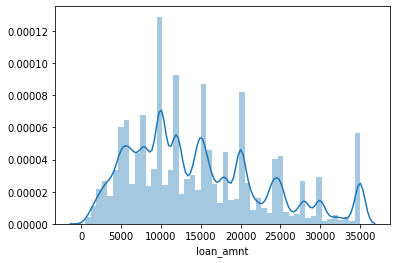

In [30]:
sns.distplot(train["loan_amnt"])

* *After ploting the distplot aganist the loan_amnt,we having the more values below the 15k.The graph as small part right skewed 

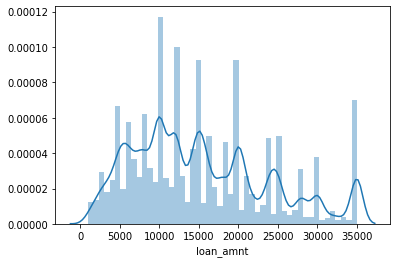

In [31]:
sns.distplot(test["loan_amnt"])

* *After ploting the distplot aganist the loan_amnt on test dataset,we having the more values below the 20k.The graph as small part right skewed 

### funded_amnt
* The total amount committed to that loan at that point in time.

In [32]:
train.funded_amnt.isnull().sum()

0

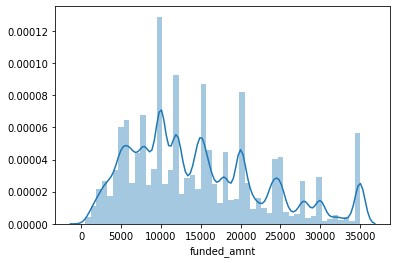

In [33]:
sns.distplot(train["funded_amnt"])

* *After ploting the distplot aganist the funded_amnt,we having the more values below the between 0 to 20k.

In [34]:
test.funded_amnt.isnull().sum()

0

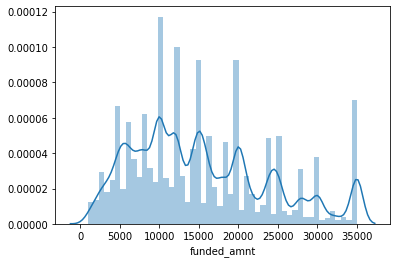

In [35]:
sns.distplot(test["funded_amnt"])

* *After ploting the distplot aganist the funded_amnt,we having the more values below the between 0 to 20k.The graph is normal distribution

### funded_amnt_inv
The total amount committed by investors for that loan at that point in time.

In [36]:
train.funded_amnt_inv.isnull().sum()

0

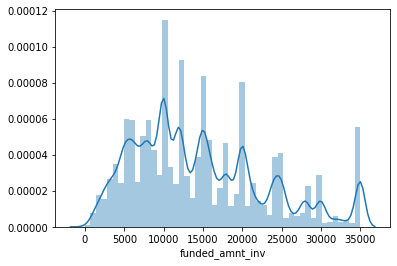

In [37]:
## funded_amnt_inv
sns.distplot(train['funded_amnt_inv'])

* *After ploting the distplot aganist the funded_amnt_inv.By seeing the graph we can see that more values are fall under the 20k, And it is not having the null values also

In [38]:
test.funded_amnt_inv.isnull().sum()

0

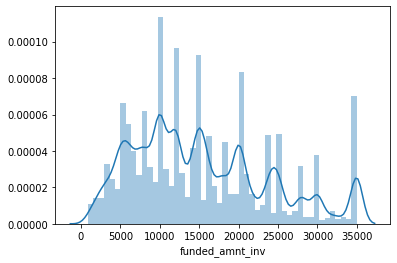

In [39]:
sns.distplot(test['funded_amnt_inv'])

* *After ploting the distplot aganist the funded_amnt_inv.By seeing the graph we can see that more values are fall under the 20k, And it is not having the null values also

### term
The number of payments on the loan. Values are in months and can be either 36 or 60.

In [40]:
train.term.dtype

dtype('O')

In [41]:
train.term.value_counts()

 36 months    427239
 60 months    171739
Name: term, dtype: int64

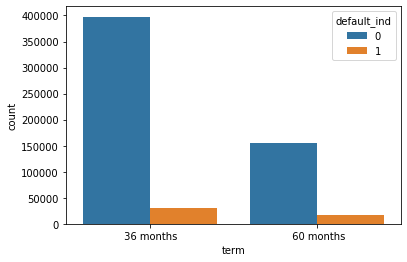

In [42]:
sns.countplot('term',data=train,hue='default_ind')

* *Ploting the graph on term and values are filled based on default_ind.By seeing the graph we can see that it is a imbalanced dataset. In term 36 months having the more 0's than 1's and for 60 months having the more 0's that 1's but compare with 36 months, it is having more values

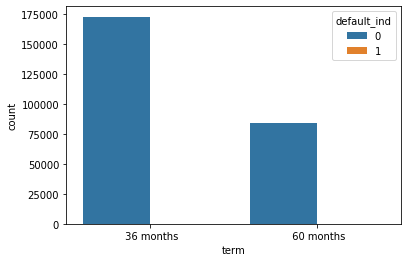

In [43]:
sns.countplot('term',data=test,hue='default_ind')

* *Ploting the graph on term and values are filled based on default_ind.By seeing the graph we can see that it is a imbalanced dataset. In term 36 months having only 0's and it did have any 1's and for 60 months having the more 0's but it is not having 1's.compare between them 36 months having more values

###  int_rate
Interest Rate on the loan

In [44]:
## int_rate,
(train['int_rate']).isnull().sum()
#(train['installment']).isnull().sum()

0

In [45]:
train.int_rate[:10]

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
5     7.90
6    15.96
7    18.64
8    21.28
9    12.69
Name: int_rate, dtype: float64

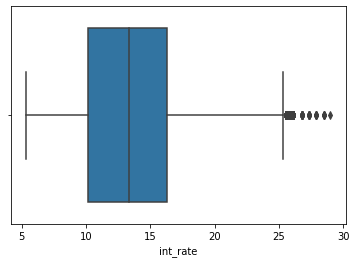

In [46]:
sns.boxplot(train['int_rate'])

* *ploting the graph on int_rate.By seeing graph we can observed that min is 5 and max is 25.And 25th point it is having outliters,q1 is 10,q2 is 12 and q3 17

In [47]:
test.int_rate[:10]

452272     5.32
452273    19.48
452274     7.49
452275    17.97
452276     6.99
452277    14.85
452278     9.80
452279     8.49
452280    13.99
452281    10.78
Name: int_rate, dtype: float64

In [48]:
(test['int_rate']).isnull().sum()
#(test['installment']).isnull().sum()

0

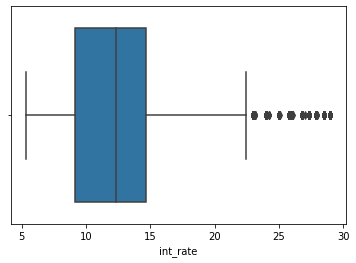

In [49]:
sns.boxplot(test['int_rate'])

* *ploting the graph on int_rate.By seeing graph we can observed that min is 5 and max is 23.And 23th point it is having outliters,q1 is 9,q2 is 12 and q3 15

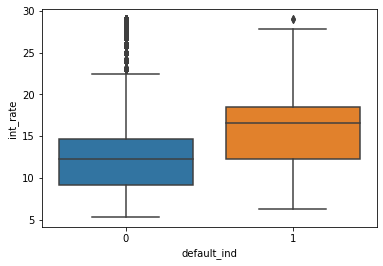

In [50]:
sns.boxplot(x='default_ind', y='int_rate', data=test)

* *Ploting the boxplot between default_ind and int_rate.By seeing boxplot we can understand that 0's values having more outliers than 1's.for int_rate 0's from 5 and max is 22, for int_rate 1's start from 6 and max value is 28  

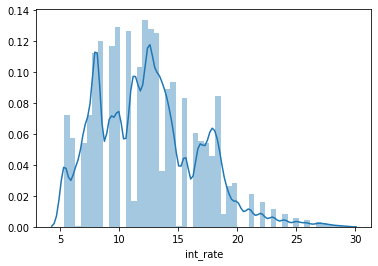

In [51]:
sns.distplot(test['int_rate'])

### installment
The monthly payment owed by the borrower if the loan originates.

In [52]:
(test['installment']).isnull().sum()

0

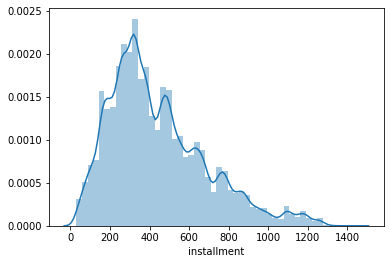

In [53]:
sns.distplot(test['installment'])

* *By Ploting the graph on installment,we can see that it is right skewed distribution. That means most of the values are fall below the 600 values, it is because data is imbalanced

### grade
XYZ corp. assigned loan grade

In [54]:
# grade
train.grade.value_counts()

B    173419
C    163121
A    100727
D     96354
E     45902
F     15689
G      3766
Name: grade, dtype: int64

In [55]:
(train['grade']).isnull().sum()

0

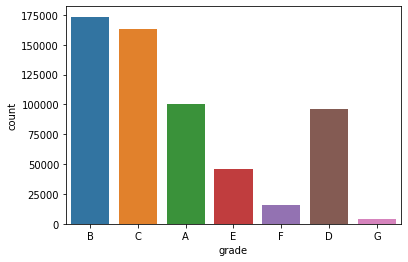

In [56]:
sns.countplot(train['grade'])

* *By Ploting the graph on the grade. we can understand that grade b and c are having the more change of giving the loan

In [57]:
test.grade.value_counts()

B    74579
C    73734
A    44938
D    36448
E    20546
F     5639
G     1107
Name: grade, dtype: int64

In [58]:
(test['grade']).isnull().sum()

0

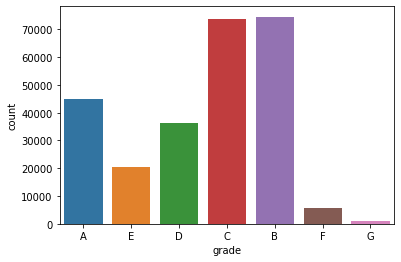

In [59]:
sns.countplot(test['grade'])

* *By Ploting the graph on the grade. we can understand that grade a,c and b are having the more change of giving the loan

In [60]:
train.shape

(598978, 48)

In [61]:
test.shape

(256991, 48)

### emp_title
The job title supplied by the Borrower when applying for the loan.

In [62]:
## emp_title
train.emp_title.value_counts().head()

Teacher             7971
Manager             6629
Registered Nurse    3315
RN                  3233
Supervisor          2936
Name: emp_title, dtype: int64

In [63]:
test.emp_title.value_counts().head()

Teacher             4994
Manager             4192
Owner               2318
Registered Nurse    2026
RN                  1949
Name: emp_title, dtype: int64

### emp_length
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [64]:
train.emp_length.value_counts()

10+ years    195407
2 years       53373
3 years       47128
< 1 year      46526
5 years       38429
1 year        37879
4 years       35792
7 years       32676
6 years       31338
8 years       29126
9 years       23199
Name: emp_length, dtype: int64

In [65]:
(train['emp_length']).isnull().sum()

28105

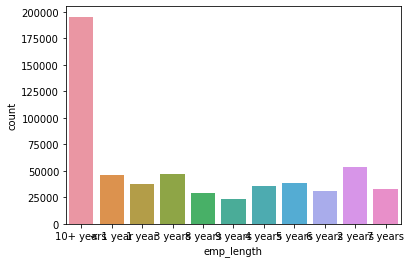

In [66]:
sns.countplot(train['emp_length'])

* *The above countplot represent no of years working, more persons are above 10+ years.so they can get the loan,but data having more null values.so we fillna values.

In [67]:
test.emp_length.value_counts()

10+ years    86683
2 years      22613
< 1 year     21071
3 years      20264
1 year       16976
5 years      15383
4 years      14851
8 years      13295
7 years      10528
9 years      10263
6 years      10108
Name: emp_length, dtype: int64

In [68]:
(test['emp_length']).isnull().sum()

14956

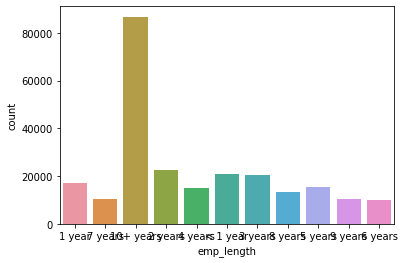

In [69]:
sns.countplot(test['emp_length'])

* *The above countplot represent no of years working, more persons are above 10+ years.so they can get the loan,but data having more null values.so we fillna values.

#### filling the null values for emp_length by using mode

In [70]:
train['emp_length'].fillna(train['emp_length'].mode()[0], inplace=True)

In [71]:
(train['emp_length']).isnull().sum()

0

In [72]:
test['emp_length'].fillna(test['emp_length'].mode()[0], inplace=True)

In [73]:
(test['emp_length']).isnull().sum()

0

In [74]:
train.emp_length.value_counts()

10+ years    223512
2 years       53373
3 years       47128
< 1 year      46526
5 years       38429
1 year        37879
4 years       35792
7 years       32676
6 years       31338
8 years       29126
9 years       23199
Name: emp_length, dtype: int64

### pymnt_plan
Indicates if a payment plan has been put in place for the loan

In [75]:
## pymnt_plan
train.pymnt_plan.value_counts()

n    598973
y         5
Name: pymnt_plan, dtype: int64

In [76]:
test.pymnt_plan.value_counts()

n    256991
Name: pymnt_plan, dtype: int64

In [77]:
## we having more n values so we are removing the pymnt_plan
train.drop('pymnt_plan', axis=1, inplace=True)

In [78]:
test.drop('pymnt_plan', axis=1, inplace=True)

* *we having more n values in pymnt_plan even thought we fill the values it is not useful for our model so better to remove the pymnt_plan variable

In [79]:
## drop title,zip_code,addr_state,earliest_cr_line by removing these values it did,nt get effect in output
train=train.drop(['title','zip_code','addr_state','earliest_cr_line','emp_title'],1)

In [80]:
test=test.drop(['title','zip_code','addr_state','earliest_cr_line','emp_title'],1)

* *The variables title,zip_code,addr_state,earliest_cr_line,emp_title can be remove because these values it did,nt make effect of our model

In [81]:
train.shape

(598978, 42)

In [82]:
test.shape

(256991, 42)

### total_rec_late_fee
Late fees received to date

In [83]:
train.total_rec_late_fee.value_counts().head(5)

0.00     589426
15.00      2081
30.00       244
45.00        28
17.41        14
Name: total_rec_late_fee, dtype: int64

In [84]:
test.total_rec_late_fee.value_counts().head(5)

0.00     256569
15.00       167
30.00         5
16.77         3
58.37         3
Name: total_rec_late_fee, dtype: int64

In [85]:
## most of the values are fall under 0 so we can remove the variable
train.drop('total_rec_late_fee', axis=1,inplace=True)

In [86]:
test.drop('total_rec_late_fee', axis=1,inplace=True)

* *Most of the values are fall under 0 so even though we fill the data it can'nt give more any impact on our model, so we can remove the variable

### revol_util
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [87]:
train.revol_util.value_counts().head()

0.0     2599
53.0    1144
58.0    1140
59.0    1102
61.0    1101
Name: revol_util, dtype: int64

In [88]:
(train['revol_util']).isnull().sum()

341

In [89]:
test.revol_util.value_counts().head()

0.0     762
59.0    592
44.0    583
52.0    583
58.0    583
Name: revol_util, dtype: int64

In [90]:
(test['revol_util']).isnull().sum()

105

In [91]:
train['revol_util'].fillna(train['revol_util'].median(), inplace=True)

In [92]:
test['revol_util'].fillna(test['revol_util'].median(), inplace=True)

* *revol_util variable having the null values so we are filling the values by using median

### recoveries
post charge off gross recovery

In [93]:
(train['recoveries']).isnull().sum()

0

In [94]:
## recoveries
train.recoveries.value_counts().head(5)

0.00      574792
200.00        10
11.70          9
14.28          9
16.50          8
Name: recoveries, dtype: int64

In [95]:
(test['recoveries']).isnull().sum()

0

In [96]:
test.recoveries.value_counts().head(5)

0.00        256990
26308.47         1
Name: recoveries, dtype: int64

In [97]:
## in most of the value are in 0 only so we can remove the variable
train.drop('recoveries',axis=1,inplace=True)

In [98]:
test.drop('recoveries',axis=1,inplace=True)

* *In recoveries more values fall under the 0. we can cannot fill the values,so we are removing the values

### collection_recovery_fee
post charge off collection fee

In [99]:
(train['collection_recovery_fee']).isnull().sum()

0

In [100]:
## collection_recovery_fee
train.collection_recovery_fee.value_counts().head(5)

0.00    575943
2.00        15
4.52        11
1.88        11
2.52        11
Name: collection_recovery_fee, dtype: int64

In [101]:
(test['collection_recovery_fee']).isnull().sum()

0

In [102]:
test.collection_recovery_fee.value_counts().head(5)

0.0    256991
Name: collection_recovery_fee, dtype: int64

### last_pymnt_d
Last month payment was received

In [103]:
## last_pymnt_d
train.last_pymnt_d.value_counts().head()

Jan-2016    273965
Dec-2015     93163
Jul-2015     14036
Aug-2015     12178
Jun-2015     11874
Name: last_pymnt_d, dtype: int64

In [104]:
test.last_pymnt_d.value_counts().head()

Jan-2016    193545
Dec-2015     49620
Nov-2015      1640
Oct-2015      1400
Sep-2015      1009
Name: last_pymnt_d, dtype: int64

* *As it is a time series data,better we can drop it

### last_credit_pull_d
The most recent month LC pulled credit for this loan

In [105]:
## last_credit_pull_d
train.last_credit_pull_d.value_counts().head(5)

Jan-2016    451313
Dec-2015     16765
Nov-2015      9902
Sep-2015      9258
Oct-2015      9241
Name: last_credit_pull_d, dtype: int64

In [106]:
test.last_credit_pull_d.value_counts().head(5)

Jan-2016    250374
Dec-2015      2274
Nov-2015      1486
Oct-2015      1049
Sep-2015       727
Name: last_credit_pull_d, dtype: int64

* *As it is a time series data,better we can drop it

### collections_12_mths_ex_med
Number of collections in 12 months excluding medical collections

In [107]:
(train['collections_12_mths_ex_med']).isnull().sum()

56

In [108]:
## collections_12_mths_ex_med
train.collections_12_mths_ex_med.value_counts().head(5)

0.0    592719
1.0      5772
2.0       380
3.0        37
4.0         8
Name: collections_12_mths_ex_med, dtype: int64

In [109]:
(test['collections_12_mths_ex_med']).isnull().sum()

0

In [110]:
test.collections_12_mths_ex_med.value_counts().head(5)

0.0    252049
1.0      4548
2.0       329
3.0        43
4.0        14
Name: collections_12_mths_ex_med, dtype: int64

### acc_now_delinq
The number of accounts on which the borrower is now delinquent.

In [111]:
## acc_now_delinq
train.acc_now_delinq.value_counts()

0.0     596424
1.0       2389
2.0        136
3.0         21
4.0          4
5.0          2
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

In [112]:
test.acc_now_delinq.value_counts()

0.0    255615
1.0      1304
2.0        62
3.0         7
4.0         2
5.0         1
Name: acc_now_delinq, dtype: int64

* *98% of the data has value equal to zero ,better to frop it.

### tot_coll_amt

In [113]:
## tot_coll_amt
train.tot_coll_amt.value_counts().head()/train.shape[0]*100

0.0      76.981959
50.0      0.190658
100.0     0.144413
75.0      0.113360
60.0      0.073458
Name: tot_coll_amt, dtype: float64

In [114]:
test.tot_coll_amt.value_counts().head()/test.shape[0]*100

0.0      84.032904
50.0      0.212459
100.0     0.171990
75.0      0.124129
150.0     0.102727
Name: tot_coll_amt, dtype: float64

* *7.8% of values are missing and 79% are having 0.0 as its value. Let's drop this column.

### tot_cur_bal

In [115]:
train.tot_cur_bal.isnull().sum()

67313

In [116]:
## tot_cur_bal
train.tot_cur_bal.value_counts().head()

0.0        96
19820.0    18
14186.0    17
12843.0    17
23254.0    16
Name: tot_cur_bal, dtype: int64

In [117]:
test.tot_cur_bal.isnull().sum()

0

In [118]:
test.tot_cur_bal.value_counts().head()

0.0        25
11605.0    11
18392.0    10
31693.0     9
53102.0     9
Name: tot_cur_bal, dtype: int64

#### As the tot_cur_bal having the null values we are filling them with median value

In [119]:
train['tot_cur_bal'].fillna(train['tot_cur_bal'].median(), inplace=True)

In [120]:
test['tot_cur_bal'].fillna(test['tot_cur_bal'].median(), inplace=True)

### total_rev_hi_lim

In [121]:
## total_rev_hi_lim
train.total_rev_hi_lim.isnull().sum()

67313

In [122]:
test.total_rev_hi_lim.isnull().sum()

0

In [123]:
train['total_rev_hi_lim'].fillna(train['total_rev_hi_lim'].median(), inplace=True)

In [124]:
test['total_rev_hi_lim'].fillna(test['total_rev_hi_lim'].median(), inplace=True)

* *As the total_rev_hi_lim having the null values we are filling them with median value

In [125]:
## collection_recovery_fee having more values in 0 so remove it
## last_pymnt_d is in time series so remove it
## last_credit_pull_d is in time series so remove it
## collections_12_mths_ex_med most of values are in the 0 so remove it
## acc_now_delinq most of the values are in 0 so remove it
## tot_coll_amt most of the values are in 0 so remove it
train=train.drop(['collection_recovery_fee','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','acc_now_delinq',
                     'tot_coll_amt'],1)

In [126]:
test=test.drop(['collection_recovery_fee','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','acc_now_delinq',
                     'tot_coll_amt'],1)

In [127]:
train.shape

(598978, 34)

In [128]:
test.shape

(256991, 34)

In [129]:
train.default_ind.value_counts()

0    552822
1     46156
Name: default_ind, dtype: int64

In [130]:
test.default_ind.value_counts()

0    256680
1       311
Name: default_ind, dtype: int64

In [131]:
train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'policy_code', 'application_type', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [132]:
'annual_inc','dti','out_prncp', 'out_prncp_inv','total_rec_prncp','last_pymnt_amnt'

('annual_inc',
 'dti',
 'out_prncp',
 'out_prncp_inv',
 'total_rec_prncp',
 'last_pymnt_amnt')

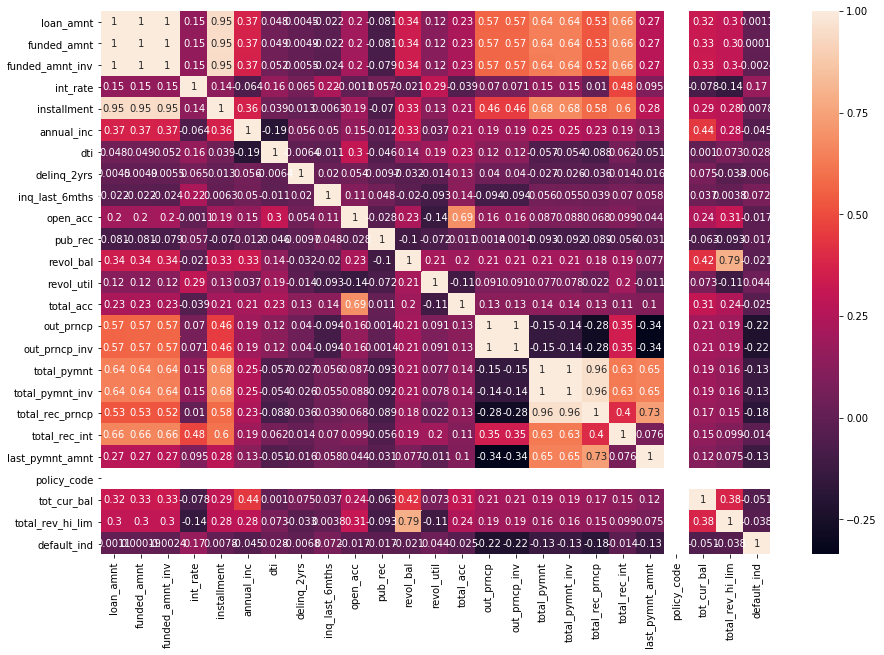

In [133]:
plt.figure(figsize = (15,10))
sns.heatmap(train.corr(),annot = True)

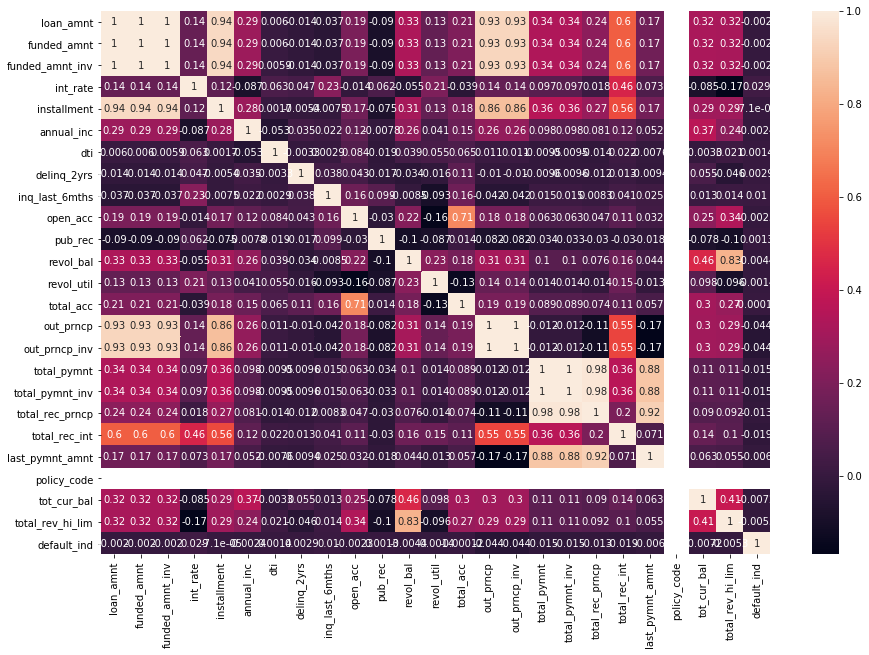

In [134]:
plt.figure(figsize = (15,10))
sns.heatmap(test.corr(),annot = True)

* * After seeing the above heatmap for both train and test,some variables are -ve correlated and some having the high correlated,i remove those variables and built the model,i got good but as it is a classification algorithm we should also see the precision,recall and f1-score values.After building the model i also saw the classification_report,by seeing this report i did'nt got good values for precision,recall and f1-score
* * For recall and f1-score i got 0 accuracy
* * After building the model i came to known that see variables are important for our model,so i built the model again by using all variables.

## dummification on train and test
1. I am doing the dummification because to get the same variables for both train and test dataset

In [135]:
train = pd.get_dummies(train, drop_first=True) 
test = pd.get_dummies(test, drop_first=True) 
print(train.shape)
print(test.shape)

(598978, 97)
(256991, 95)


In [136]:
train, test = train.align(test, join = 'inner', axis = 1)
print(train.shape)
print(test.shape)

(598978, 94)
(256991, 94)


In [137]:
(100*train.isnull().sum()/len(train))

loan_amnt                              0.0
funded_amnt                            0.0
funded_amnt_inv                        0.0
int_rate                               0.0
installment                            0.0
annual_inc                             0.0
dti                                    0.0
delinq_2yrs                            0.0
inq_last_6mths                         0.0
open_acc                               0.0
pub_rec                                0.0
revol_bal                              0.0
revol_util                             0.0
total_acc                              0.0
out_prncp                              0.0
out_prncp_inv                          0.0
total_pymnt                            0.0
total_pymnt_inv                        0.0
total_rec_prncp                        0.0
total_rec_int                          0.0
last_pymnt_amnt                        0.0
policy_code                            0.0
tot_cur_bal                            0.0
total_rev_h

In [138]:
train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'policy_code',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind', 'term_ 60 months',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade

In [139]:
(100*test.isnull().sum()/len(test))

loan_amnt                              0.0
funded_amnt                            0.0
funded_amnt_inv                        0.0
int_rate                               0.0
installment                            0.0
annual_inc                             0.0
dti                                    0.0
delinq_2yrs                            0.0
inq_last_6mths                         0.0
open_acc                               0.0
pub_rec                                0.0
revol_bal                              0.0
revol_util                             0.0
total_acc                              0.0
out_prncp                              0.0
out_prncp_inv                          0.0
total_pymnt                            0.0
total_pymnt_inv                        0.0
total_rec_prncp                        0.0
total_rec_int                          0.0
last_pymnt_amnt                        0.0
policy_code                            0.0
tot_cur_bal                            0.0
total_rev_h

In [140]:
test.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'policy_code',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind', 'term_ 60 months',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade

## independent and dependent variables

In [141]:
# Now spliting into x_train,x_test,y_train,y_test
X_train = train[train.columns.difference(['default_ind'])]
y_train = train['default_ind']

X_test = test[test.columns.difference(['default_ind'])]
y_test = test['default_ind']

In [142]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(598978, 93)
(598978,)
(256991, 93)
(256991,)


## Model 1

In [143]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

print(logistic.score(X_train, y_train))
print(logistic.score(X_test, y_test))

0.9967828534603942
0.9996264460623134


In [144]:
X_train.shape

(598978, 93)

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print (cross_val_score(logreg, X_train, y_train, cv=10).mean())
#print(cross_val_score(logreg,X_train,X_test,cv=10,scoring='accuracy').mean())

0.9959597824641205


In [146]:
y_pred = logistic.predict(X_test)

In [147]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.999626,0.882562,0.797428,0.837838,0.89865


In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.88      0.80      0.84       311

    accuracy                           1.00    256991
   macro avg       0.94      0.90      0.92    256991
weighted avg       1.00      1.00      1.00    256991



In [149]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[256647,     33],
       [    63,    248]], dtype=int64)

#### Model 1 conclusion
1. In model 1 i apply the logistic regression. i got the good accuracy,but by seeing the model we can undersatnd that it is a imbalaced dataset. 
2. For  classification problem we should  consider the precision,recall and f1-score values.
3. By seeing the classification_report,the  0's value having the more accuracy then the 1' because it is a imbalanced data we should convert it into balanced data

## Model 2
## appling the upsampling on dataset
1. This dataset is imbalanced data set. so we are appling the upsampling by importing the SMOTETomek, so that we can achive the balanced data

In [150]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

Using TensorFlow backend.


In [151]:
state = np.random.RandomState()
X_outliers = state.uniform(low=0, high=1, size=(X_train.shape[0], X_test.shape[1]))
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)
print(y_train.shape)

(598978, 93)
(256991,)
(256991, 93)
(598978,)


In [152]:
smk = SMOTETomek()
X_train_res,y_train_res=smk.fit_sample(X_train,y_train)

In [153]:
#X_test_res,y_test_res=smk.fit_sample(X_test,y_test)

In [154]:
X_train_res.shape

(1104830, 93)

In [155]:
#X_test_res.shape

In [156]:
y_train_res.shape

(1104830,)

In [157]:
#y_test_res.shape

## apply the logistic model on upsampling
1. The logistic model which we apply before the upsampling, we did not achive the good results.
2. The logistic model which we apply after the upsampling, we achive the good results than on which we did not apply the any sampling techinque

In [158]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train_res, y_train_res)
logistic.fit(X_test, y_test)
print(logistic.score(X_train_res, y_train_res))
print(logistic.score(X_test, y_test))

0.9270602717160106
0.9997431816678405


In [159]:
y_train_pred = logistic.predict(X_train_res)

In [160]:
y_test_pred = logistic.predict(X_test)

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93    552415
           1       1.00      0.85      0.92    552415

    accuracy                           0.93   1104830
   macro avg       0.94      0.93      0.93   1104830
weighted avg       0.94      0.93      0.93   1104830



In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.79      0.88       311

    accuracy                           1.00    256991
   macro avg       1.00      0.89      0.94    256991
weighted avg       1.00      1.00      1.00    256991



In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[256680,      0],
       [    66,    245]], dtype=int64)

In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_res, y_train_pred)

array([[552398,     17],
       [ 80569, 471846]], dtype=int64)

In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg,X_train_res,y_train_res,cv=5,scoring='accuracy').mean())

0.9882217173682829


In [166]:
print(cross_val_score(logreg,X_test,y_test,cv=5,scoring='accuracy').mean())

0.97753263318785


In [167]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_samples_split=0.25)
dt.fit(X_train_res, y_train_res)

print(dt.score(X_train_res, y_train_res))
print(dt.score(X_test, y_test))

0.9401518785695537
0.9989299236160021


In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93    552415
           1       1.00      0.85      0.92    552415

    accuracy                           0.93   1104830
   macro avg       0.94      0.93      0.93   1104830
weighted avg       0.94      0.93      0.93   1104830



In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.79      0.88       311

    accuracy                           1.00    256991
   macro avg       1.00      0.89      0.94    256991
weighted avg       1.00      1.00      1.00    256991



In [170]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')
rfc.fit(X_train_res,y_train_res)
print(rfc.score(X_train_res, y_train_res))
print(rfc.score(X_test, y_test))

0.9996886398812487
0.8963543470393904


In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93    552415
           1       1.00      0.85      0.92    552415

    accuracy                           0.93   1104830
   macro avg       0.94      0.93      0.93   1104830
weighted avg       0.94      0.93      0.93   1104830



In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.79      0.88       311

    accuracy                           1.00    256991
   macro avg       1.00      0.89      0.94    256991
weighted avg       1.00      1.00      1.00    256991



#### Model 2 conclusion
1. In model 2 as it is imbalanced data,i apply the sampling the technique that is upsampling by using the SMOTETomek.
2. In model 2 we apply upsampling technique on the logistic,decision tree and random forest.
3. By comparing the model 1 with the model 2 i got good accuracy and i got good precision,recall,f1-score values.
4. By comparing the tree algorithms in model 2,i got good accuracy for random forest

## Model 3
## appling the downsampling on dataset
1. This dataset is imbalanced data set. so we are appling the downsampling by importing the NearMiss, so that we can achive the balanced data

In [173]:
from imblearn.under_sampling import NearMiss

In [174]:
nm = NearMiss()
X_train_res_1,y_train_res_1=nm.fit_sample(X_train,y_train)

In [175]:
#X_test_res_1,y_test_res_1=nm.fit_sample(X_test,y_test)

In [176]:
X_train_res_1.shape

(92312, 93)

In [177]:
#X_test_res_1.shape

In [178]:
y_train_res_1.shape

(92312,)

In [179]:
#y_test_res_1.shape

## apply logistic model on the downsampling

In [180]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train_res_1, y_train_res_1)
logistic.fit(X_test, y_test)
print(logistic.score(X_train_res_1, y_train_res_1))
print(logistic.score(X_test, y_test))

0.915103128520669
0.9997431816678405


In [181]:
y_train_pred = logistic.predict(X_train_res_1)

In [182]:
y_test_pred = logistic.predict(X_test)

In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res_1, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46156
           1       1.00      0.83      0.91     46156

    accuracy                           0.92     92312
   macro avg       0.93      0.92      0.91     92312
weighted avg       0.93      0.92      0.91     92312



In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.79      0.88       311

    accuracy                           1.00    256991
   macro avg       1.00      0.89      0.94    256991
weighted avg       1.00      1.00      1.00    256991



In [185]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[256680,      0],
       [    66,    245]], dtype=int64)

In [186]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_res_1, y_train_pred)

array([[46156,     0],
       [ 7837, 38319]], dtype=int64)

In [187]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_res_1, y_train_res_1)

print(dt.score(X_train_res_1, y_train_res_1))
print(dt.score(X_test, y_test))

1.0
0.11325299329548505


In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res_1, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46156
           1       1.00      0.83      0.91     46156

    accuracy                           0.92     92312
   macro avg       0.93      0.92      0.91     92312
weighted avg       0.93      0.92      0.91     92312



In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.79      0.88       311

    accuracy                           1.00    256991
   macro avg       1.00      0.89      0.94    256991
weighted avg       1.00      1.00      1.00    256991



In [190]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_res_1,y_train_res_1)
print(rfc.score(X_train_res_1, y_train_res_1))
print(rfc.score(X_test, y_test))

1.0
0.06915417271421956


In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res_1, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46156
           1       1.00      0.83      0.91     46156

    accuracy                           0.92     92312
   macro avg       0.93      0.92      0.91     92312
weighted avg       0.93      0.92      0.91     92312



In [192]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.79      0.88       311

    accuracy                           1.00    256991
   macro avg       1.00      0.89      0.94    256991
weighted avg       1.00      1.00      1.00    256991



#### Model 3 conclusion
1. In model 3 as it is imbalanced data,i apply the sampling the technique that is downsampling by using the NearMiss.
2. In model 2 we apply downsampling technique on the logistic,decision tree and random forest.
3. By comparing the model 2 with the model 3 i did'nt got good accuracy and i did'nt got good precision,recall,f1-score values.
4. By comparing the tree algorithms in model 2,i got good accuracy for logitic regression

## stacking

In [193]:
from sklearn.ensemble import StackingClassifier
estimators = [('logistic',logistic), ('dt',dt), ('rf',rfc)]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stack.fit(X_train_res, y_train_res)

print(stack.score(X_train_res, y_train_res))
print(stack.score(X_test, y_test))

1.0
0.7693576817865218


## conclusion
1. By comparing between the model 1,model 2,model 3 we are getting the good results on model 2 and model 3
2. By comparing between the model 2 and model 3 we are getting good results on the model 2 by using the logistic,decision tree and random forest algorithms
3. For this problem model2(upsampling) was giving good results on logistic,decision tree and random forest algorithms by comparting with model3(downsampling)